In [30]:

# Aim : Perform the following operations using Python on the Air quality and Heart Diseases data sets

# 1. Data cleaning
# 2. Data integration
# 3. Data transformation
# 4. Error correcting
# 5. Data model building


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
A= pd.read_csv('airquality1.csv')


In [32]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high


Cleaning Data

In [33]:
#Dropping columns
A = A.drop(['Unnamed: 0'], axis=1)


In [34]:
#Checking null values in dataset
A.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
humidity     4
dtype: int64

In [35]:
#taking mean of ozone solar and humidity
meanOzone = A[['Ozone']].mean()
meanSolar = A[['Solar.R']].mean()
meanhumidity = A['humidity'].mode()[0]

In [36]:
#Filling null values
A[["Ozone"]]=A[["Ozone"]].fillna(value=meanOzone)
A[["Solar.R"]]=A[["Solar.R"]].fillna(value=meanSolar)
A[["humidity"]]=A[["humidity"]].fillna(value=meanhumidity)

In [37]:
A.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
humidity    0
dtype: int64

#Data Integration

In [38]:


subset1 = A.loc[0:5,['Ozone']]
subset2 = A.loc[0:10,['humidity','Ozone']]


In [39]:
subset1.shape


(6, 1)

In [40]:
subset2.shape

(11, 2)

In [41]:
merge= subset2.merge(subset1)
merge.shape

(7, 2)

Data Transformation

In [42]:
new_humidity=pd.get_dummies(A['humidity'])
new=pd.concat([A,new_humidity],axis=1)
new



,Ozone,Solar.R,Wind,Temp,Month,Day,humidity,high,low,medium
0,41.00000,190.000000,7.4,67,5,1,high,1,0,0
1,36.00000,118.000000,8.0,72,5,2,high,1,0,0
2,12.00000,149.000000,12.6,74,5,3,high,1,0,0
3,18.00000,313.000000,11.5,62,5,4,high,1,0,0
4,42.12931,185.931507,14.3,56,5,5,high,1,0,0
...,...,...,...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,high,1,0,0
149,42.12931,145.000000,13.2,77,9,27,high,1,0,0
150,14.00000,191.000000,14.3,75,9,28,high,1,0,0
151,18.00000,131.000000,8.0,76,9,29,high,1,0,0


Model Building

In [43]:

X = A[['Ozone']]
Y = A[['Temp']]

In [44]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [45]:

X_train.shape

(122, 1)

In [46]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,Y_train)
predictions=reg.predict(X_test)
predictions

array([[81.79264184],
       [77.61812593],
       [70.91290231],
       [73.96686428],
       [72.63075592],
       [86.94620266],
       [76.63908101],
       [77.61812593],
       [77.61812593],
       [72.24901068],
       [80.83827872],
       [75.68471789],
       [77.61812593],
       [85.22834905],
       [73.96686428],
       [81.60176921],
       [72.05813805],
       [72.24901068],
       [85.80096692],
       [77.61812593],
       [77.61812593],
       [78.92955249],
       [83.1287502 ],
       [77.61812593],
       [75.68471789],
       [83.51049544],
       [77.61812593],
       [74.15773691],
       [77.97518937],
       [72.05813805],
       [77.61812593]])

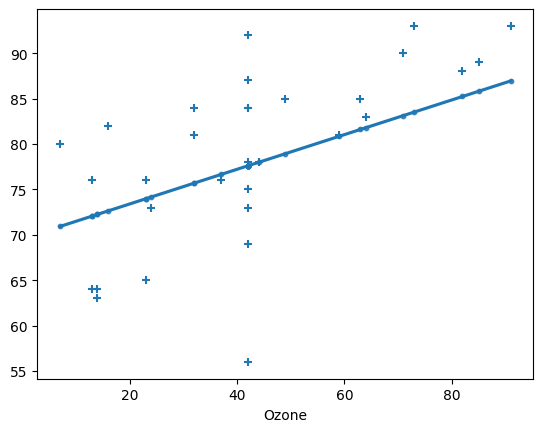

In [47]:
sbn.regplot(x=X_test['Ozone'],y=predictions,scatter_kws={'s':10})
plt.scatter(X_test['Ozone'],Y_test, marker='+')
